In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import datetime
from datetime import date
import seaborn as sns
sns.set()
from pandas.tseries.offsets import MonthEnd

In [3]:
wells = pd.read_csv('../data/InjectionWells.csv')
eq = pd.read_csv('../data/okQuakes.csv')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
wells.head()

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,Unnamed: 18
0,3511701581,CIRCLE 9 RESOURCES LLC,23209,2D,SCOTT,1,4.192000e+04,3/9/1960,PAWNEE,22,20N,06E,SW NW NW,36.200484,-96.658575,0.0,NaN,BARTLESVILLE,NaN
1,3506321671,BARTA ENTERPRISES,6320,2D,BILL BOYCE,4-12,2.579510e+05,4/24/1984,HUGHES,12,06N,10E,NE,35.010337,-96.198410,0.0,75080.0,BARTLESVILLE,NaN
2,3508123103,CIRCLE 9 RESOURCES LLC,23209,2D,LOUISE,1,3.534040e+05,1/16/1991,LINCOLN,13,15N,03E,NW SE SW SW,35.769316,-96.943941,0.0,25000.0,ARBUCKLE DOLOMITE,NaN
3,3508123142,CIRCLE 9 RESOURCES LLC,23209,2D,MVN,1,3.650090e+05,4/28/1992,LINCOLN,2,15N,03E,W2 NW SE NE,35.807216,-96.950588,0.0,25000.0,ARBUCKLE DOLOMITE,NaN
4,3515123599,TRANS PACIFIC OIL CORPORATION,23435,2D,GREG THURMAN SWD,1,1.206000e+09,5/24/2012,WOODS,29,29N,13W,SW SE SE NE,36.964685,-98.617601,0.0,25000.0,ARBUCKLE,NaN


In [5]:
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1973-03-17T07:43:05.500Z,36.087,-106.168,6.0,4.5,mb,NaN,NaN,NaN,NaN,us,usp00000z6,2014-11-06T23:21:10.078Z,New Mexico,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1973-05-25T14:40:13.900Z,33.917,-90.775,6.0,NaN,NaN,NaN,NaN,NaN,NaN,us,usp00001xj,2014-11-06T23:21:12.859Z,Mississippi,earthquake,NaN,NaN,NaN,NaN,reviewed,s,us
2,1973-09-19T13:28:20.500Z,37.160,-104.594,5.0,NaN,NaN,NaN,NaN,NaN,NaN,us,usp00003fw,2014-11-06T23:21:20.295Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,1973-09-23T03:58:54.900Z,37.148,-104.571,5.0,4.2,mb,NaN,NaN,NaN,NaN,us,usp00003hd,2014-11-06T23:21:20.346Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
4,1974-02-15T13:33:49.200Z,36.500,-100.693,24.0,4.5,mb,NaN,NaN,NaN,NaN,us,usp00005ac,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


In [5]:
wells.fillna(np.nan, inplace = True)

wells.drop('Unnamed: 18', axis=1, inplace = True)
# wells.drop('Unnamed: 19', axis=1, inplace = True)
# wells.drop('Unnamed: 20', axis=1, inplace = True)

wells.columns = [col.lower().replace(' ','_') for col in wells.columns]
# wells.set_index('api#', inplace = True)

wells['ordernumbers'].fillna(0,inplace = True)
wells['ordernumbers'] = wells['ordernumbers'].astype('int')

wells['approval_date'].str.replace('/','-')
wells['approval_date'] = pd.to_datetime(wells['approval_date'],errors='raise')

In [6]:
eq.fillna(np.nan, inplace = True)
# eq.set_index('id', inplace = True)

eq[['date','time']] = eq.time.str.split("T",expand=True) 
eq['date'] = pd.to_datetime(eq['date'],errors='raise')
eq[['time','time_zone']] = eq.time.str.split(".",expand=True) 
eq['time'] = pd.to_datetime(eq['time'], format='%H:%M:%S').dt.time


mask = eq['place'] == 'Oklahoma'
ok_eq = eq[mask]

ok_eq = ok_eq[['id','date','time','latitude','longitude','depth','mag','magType','place','type']].copy()

In [7]:
ok_eq.head()

,id,date,time,latitude,longitude,depth,mag,magType,place,type
4,usp00005ac,1974-02-15,13:33:49,36.500,-100.693,24.0,4.5,mb,Oklahoma,earthquake
34,usp0000csk,1975-09-13,01:25:02,34.139,-97.369,5.0,3.4,lg,Oklahoma,earthquake
36,usp0000d4a,1975-10-12,02:58:11,34.816,-97.406,20.0,3.2,lg,Oklahoma,earthquake
37,usp0000dsb,1975-11-29,14:29:40,34.521,-97.347,5.0,3.5,lg,Oklahoma,earthquake
44,usp0000fq3,1976-03-30,09:27:01,36.615,-102.083,5.0,2.7,lg,Oklahoma,earthquake


In [8]:
wells.head()

,api#,operator,operator_id,welltype,wellname,wellnumber,ordernumbers,approval_date,county,sec,twp,rng,qqqq,lat,long,psi,bbls,zone
0,3511701581,CIRCLE 9 RESOURCES LLC,23209,2D,SCOTT,1,41920,1960-03-09,PAWNEE,22,20N,06E,SW NW NW,36.200484,-96.658575,0.0,NaN,BARTLESVILLE
1,3506321671,BARTA ENTERPRISES,6320,2D,BILL BOYCE,4-12,257951,1984-04-24,HUGHES,12,06N,10E,NE,35.010337,-96.198410,0.0,75080.0,BARTLESVILLE
2,3508123103,CIRCLE 9 RESOURCES LLC,23209,2D,LOUISE,1,353404,1991-01-16,LINCOLN,13,15N,03E,NW SE SW SW,35.769316,-96.943941,0.0,25000.0,ARBUCKLE DOLOMITE
3,3508123142,CIRCLE 9 RESOURCES LLC,23209,2D,MVN,1,365009,1992-04-28,LINCOLN,2,15N,03E,W2 NW SE NE,35.807216,-96.950588,0.0,25000.0,ARBUCKLE DOLOMITE
4,3515123599,TRANS PACIFIC OIL CORPORATION,23435,2D,GREG THURMAN SWD,1,1206000032,2012-05-24,WOODS,29,29N,13W,SW SE SE NE,36.964685,-98.617601,0.0,25000.0,ARBUCKLE


In [9]:
well_simple = wells[['api#','approval_date','lat','long']].copy()
eq_simple = eq[['id','date','latitude','longitude','mag','depth']].copy()

well_simple = well_simple[(well_simple['approval_date'] >= '1973-03-01') & (well_simple['approval_date'] <= '2016-07-19')]

new_columns_well = ['unique_identifier', 'date','latitude', 'longitude']
new_columns_eq = ['unique_identifier', 'date','latitude', 'longitude','magnitude','epicenter_depth']
well_simple.columns = new_columns_well
eq_simple.columns = new_columns_eq

well_simple['unique_identifier'] = 'well_' + well_simple['unique_identifier'].astype(str)
eq_simple['unique_identifier'] = 'eq_' + eq_simple['unique_identifier'].astype(str)

frames = [eq_simple, well_simple]
eq_v_well = pd.concat(frames, sort=True).copy()
eq_v_well.sort_values('date')
eq_v_well = eq_v_well.set_index('unique_identifier')


In [10]:
eq_mag_depth = eq_simple[['date','epicenter_depth','magnitude']].copy()

eq_mag_depth['year'] = [x.year for x in eq_mag_depth['date']]
eq_mag_depth['month'] = [x.month for x in eq_mag_depth['date']]


In [11]:
mag_depth= eq_mag_depth.groupby(['year', 'month']).agg({'epicenter_depth':'mean','magnitude': 'mean'}).reset_index()


In [12]:
mag_depth['date']= pd.to_datetime([f'{y}-{m}-01' for y, m in zip(mag_depth.year, mag_depth.month)])
mag_depth['date']= pd.to_datetime(mag_depth['date'], format="%Y%m") + MonthEnd(1)

mag_depth.drop('year', axis=1, inplace = True)
mag_depth.drop('month', axis=1, inplace = True)

mag_depth.set_index('date', inplace = True)

In [13]:
mag_depth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412 entries, 1973-03-31 to 2016-09-30
Data columns (total 2 columns):
epicenter_depth    412 non-null float64
magnitude          411 non-null float64
dtypes: float64(2)
memory usage: 9.7 KB


In [14]:
mag_depth

,epicenter_depth,magnitude
date,,
1973-03-31,6.000000,4.500000
1973-05-31,6.000000,NaN
1973-09-30,5.000000,4.200000
1974-02-28,3.875000,3.000000
1974-04-30,1.000000,2.600000
1974-07-31,5.000000,1.850000
1974-08-31,5.000000,2.950000
1974-09-30,5.000000,2.300000
1974-11-30,5.000000,3.900000


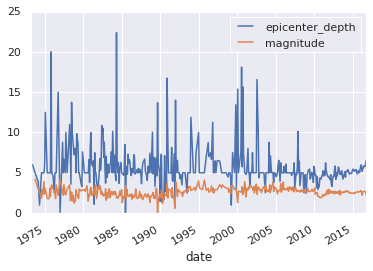

In [15]:
mag_depth.plot.line()

In [16]:
# well_bbl_psi.info()

In [17]:
well_bbl_psi = wells[['approval_date','bbls','psi']].copy()

well_bbl_psi = well_bbl_psi[(well_bbl_psi['approval_date'] >= '1973-03-01') & (well_bbl_psi['approval_date'] <= '2016-07-19')]

well_bbl_psi['year'] = [x.year for x in well_bbl_psi['approval_date']]
well_bbl_psi['month'] = [x.month for x in well_bbl_psi['approval_date']]
bbl_psi = well_bbl_psi.groupby(['year', 'month']).agg({'bbls': sum ,'psi':'mean'}).reset_index().copy()
bbl_psi.fillna(0,inplace = True)
bbl_psi.head()

,year,month,bbls,psi
0,1973,3,3450.0,479.166667
1,1973,4,14100.0,1157.272727
2,1973,5,650.0,400.000000
3,1973,6,1500.0,500.000000
4,1973,7,2300.0,560.000000


In [18]:
bbl_psi['date']= pd.to_datetime([f'{y}-{m}-01' for y, m in zip(bbl_psi.year, bbl_psi.month)])
bbl_psi['date']= pd.to_datetime(bbl_psi['date'], format="%Y%m") + MonthEnd(1)
bbl_psi.head()

,year,month,bbls,psi,date
0,1973,3,3450.0,479.166667,1973-03-31
1,1973,4,14100.0,1157.272727,1973-04-30
2,1973,5,650.0,400.000000,1973-05-31
3,1973,6,1500.0,500.000000,1973-06-30
4,1973,7,2300.0,560.000000,1973-07-31


In [19]:
bbl_psi.drop('year', axis=1, inplace = True)
bbl_psi.drop('month', axis=1, inplace = True)

bbl_psi['date']= pd.DatetimeIndex(bbl_psi['date'])


bbl_psi.set_index('date', inplace = True)

bbl_psi

,bbls,psi
date,,
1973-03-31,3450.0,479.166667
1973-04-30,14100.0,1157.272727
1973-05-31,650.0,400.000000
1973-06-30,1500.0,500.000000
1973-07-31,2300.0,560.000000
...,...,...
2016-03-31,104439.0,1774.642857
2016-04-30,185386.0,1583.176471
2016-05-31,246146.0,2085.730769


In [20]:
bbl_psi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 1973-03-31 to 2016-07-31
Data columns (total 2 columns):
bbls    520 non-null float64
psi     520 non-null float64
dtypes: float64(2)
memory usage: 12.2 KB


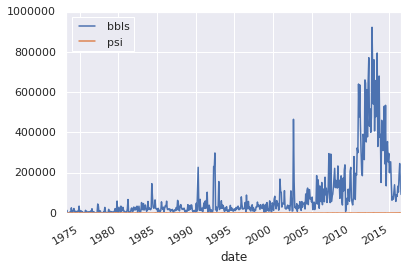

In [21]:
bbl_psi.plot.line()

In [22]:
well_eq_by_month = pd.DataFrame(columns=['num_wells/month','num_eq/month'])

wells_to_dt = pd.to_datetime(well_simple['date'])
well_build_idx = pd.DatetimeIndex(wells_to_dt)
final = well_build_idx.to_series()
well_eq_by_month['num_wells/month']= final.resample('M').count()

eq_to_dt = pd.to_datetime(eq_simple['date'])
eq_build_idx = pd.DatetimeIndex(eq_to_dt)
final = eq_build_idx.to_series()
well_eq_by_month['num_eq/month'] = final.resample('M').count()




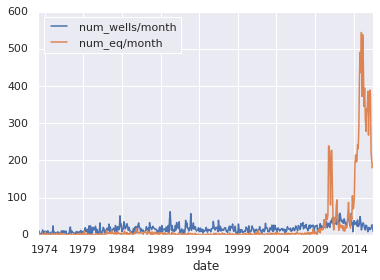

In [23]:
well_eq_by_month.plot.line()

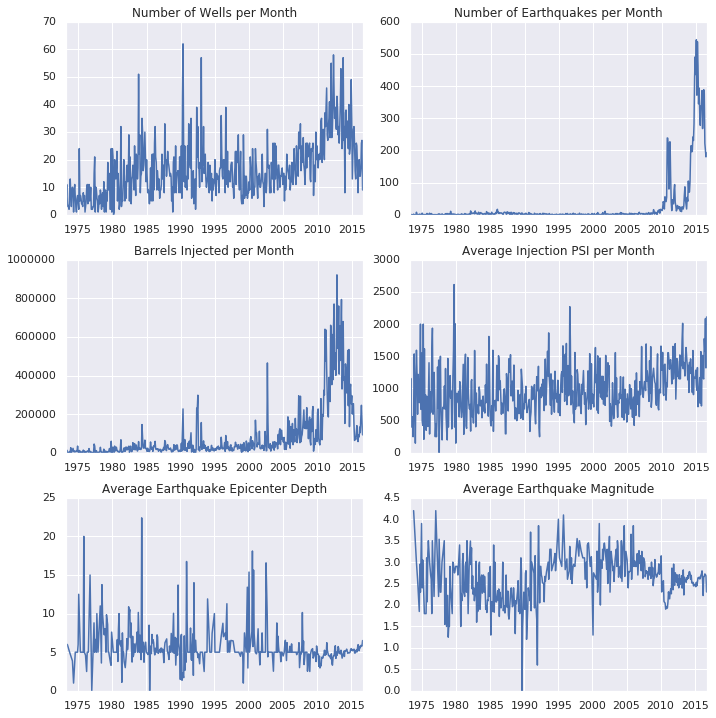

In [51]:
fig, ax = plt.subplots(3,2, figsize = (10,10))
ax[0,0].plot(well_eq_by_month.index, well_eq_by_month['num_wells/month'])
ax[0,0].set_title('Number of Wells per Month', loc = 'center')
ax[0,1].plot(well_eq_by_month.index, well_eq_by_month['num_eq/month'])
ax[0,1].set_title('Number of Earthquakes per Month', loc = 'center')
ax[1,0].plot(bbl_psi.index, bbl_psi['bbls'])
ax[1,0].set_title('Barrels Injected per Month', loc = 'center')
ax[1,1].plot(bbl_psi.index, bbl_psi['psi'])
ax[1,1].set_title('Average Injection PSI per Month', loc = 'center')
ax[2,0].plot(mag_depth.index, mag_depth['epicenter_depth'])
ax[2,0].set_title('Average Earthquake Epicenter Depth', loc = 'center')
ax[2,1].plot(mag_depth.index, mag_depth['magnitude'])
ax[2,1].set_title('Average Earthquake Magnitude', loc = 'center')
plt.tight_layout(pad=0.8, w_pad=0.5, h_pad=1.0)
plt.savefig('../images/eda_fig1.png')



# bbl_psi.plot.line()
# well_eq_by_month.plot.line(ax=0)
# bbl_psi.plot.line(ax=1)
# ax.set_yscale('log')



In [25]:
well_eq_by_month

,num_wells/month,num_eq/month
date,,
1973-03-31,6,1
1973-04-30,11,0
1973-05-31,4,1
1973-06-30,3,0
1973-07-31,3,0
...,...,...
2016-03-31,14,377
2016-04-30,17,222
2016-05-31,26,201


In [26]:
count_mag_depth = well_eq_by_month.merge(mag_depth, how='outer', left_index=True, right_index=True)

well_eq_all = count_mag_depth.merge(bbl_psi, how='outer', left_index=True, right_index=True)


In [27]:
well_eq_all = well_eq_all.reset_index()

In [28]:
pre_2012 = well_eq_all[(well_eq_all['date'] < '2012-01-01')]
post_2012 = well_eq_all[(well_eq_all['date'] > '2012-01-01')]

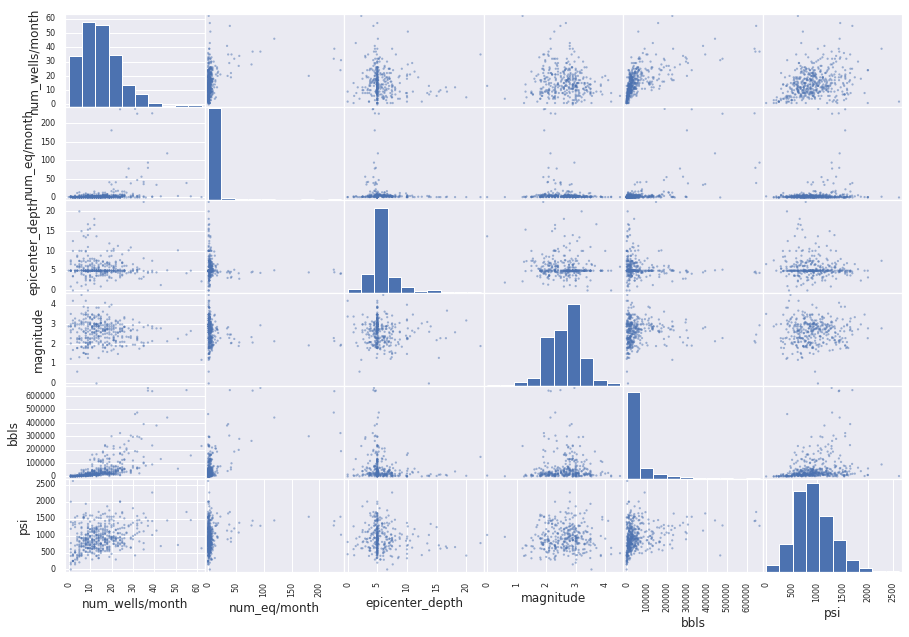

In [29]:
pd.plotting.scatter_matrix(pre_2012, figsize=(15, 10))
plt.show()

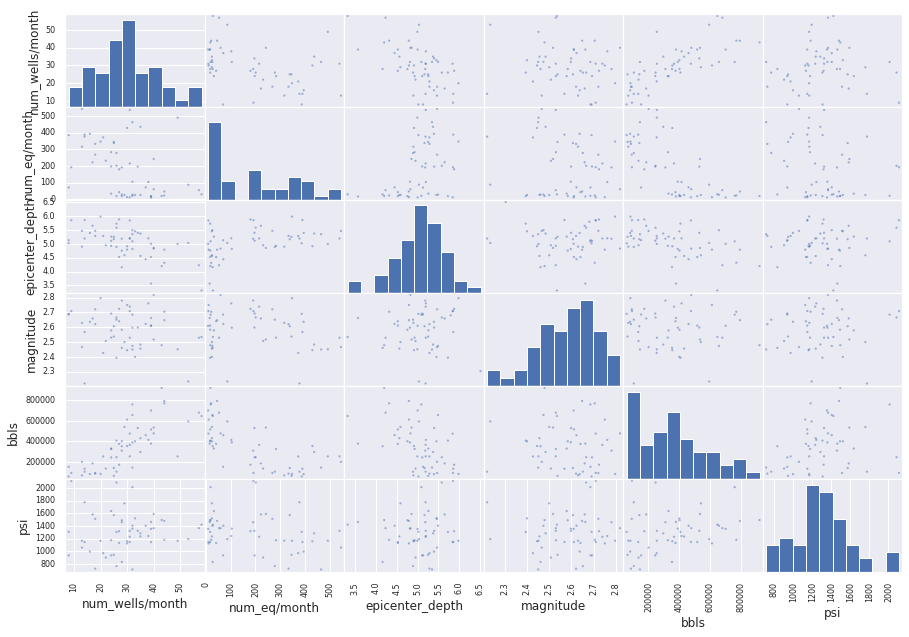

In [30]:
pd.plotting.scatter_matrix(post_2012, figsize=(15, 10))
plt.show()